# Results From Multiple hadm_id calls

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [29]:
# Code for plotting the processing times for patients
def plot_bar_chart(processing_times_in_seconds):
    # Calculate total processing time
    total_processing_time = sum(processing_times_in_seconds)

    # List of patient numbers
    patient_numbers = list(range(1, 16))

    # Create the bar chart with updated title
    plt.figure(figsize=(10, 6))
    plt.bar(patient_numbers, processing_times_in_seconds, color='skyblue')
    plt.xlabel('Patient Number')
    plt.ylabel('Processing Time (seconds)')
    plt.title(f'Processing Time for Each Patient (Total Time: {total_processing_time} seconds)')
    plt.xticks(patient_numbers)
    plt.ylim(0, max(processing_times_in_seconds) + 20)  # Add some padding to the y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    # Display the chart
    plt.show()

The following trials are for `6-mult-llama3.py` and the outputs are  (in `results` folder). This code calls the `check_for_pneumonia()` function 15 times but does **not** do it asynchronously.

## Trial 1: `6-mult-llama3.py`

Model Info: llama3, chunk_size=4096, chunk_overlap=100

First 15 patient ID's: [20015730, 20022465, 20025172, 20031665, 20038242, 20050336, 20060499, 20067108, 20068469, 20069079, 20070255, 20073235, 20078619, 20087467, 20088556]


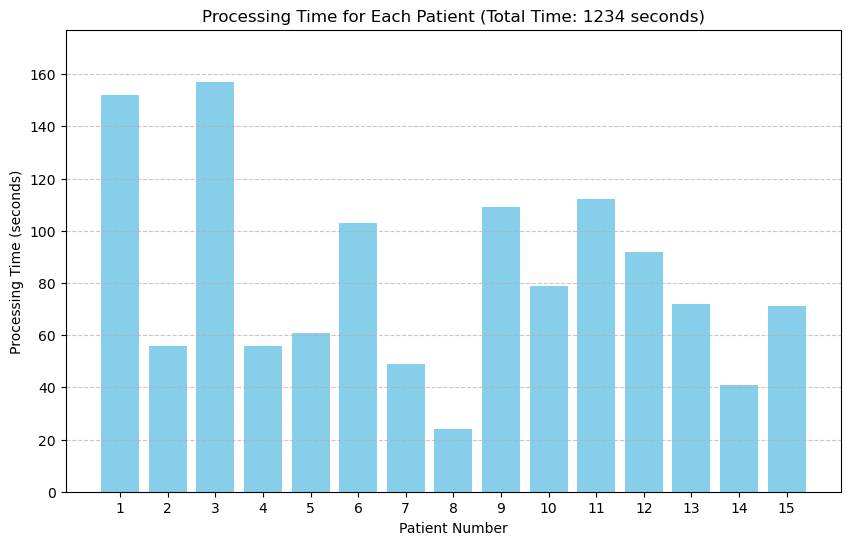

In [30]:
processing_times_in_seconds = [152, 56, 157, 56, 61, 103, 49, 24, 109, 79, 112, 92, 72, 41, 71]
plot_bar_chart(processing_times_in_seconds)

## Trial 2: `6-mult-llama3.py`

Ran the exact same code with the same parameters and hadm_id again.

Model Info: llama3, chunk_size=4096, chunk_overlap=100

First 15 patient ID's: [20015730, 20022465, 20025172, 20031665, 20038242, 20050336, 20060499, 20067108, 20068469, 20069079, 20070255, 20073235, 20078619, 20087467, 20088556]


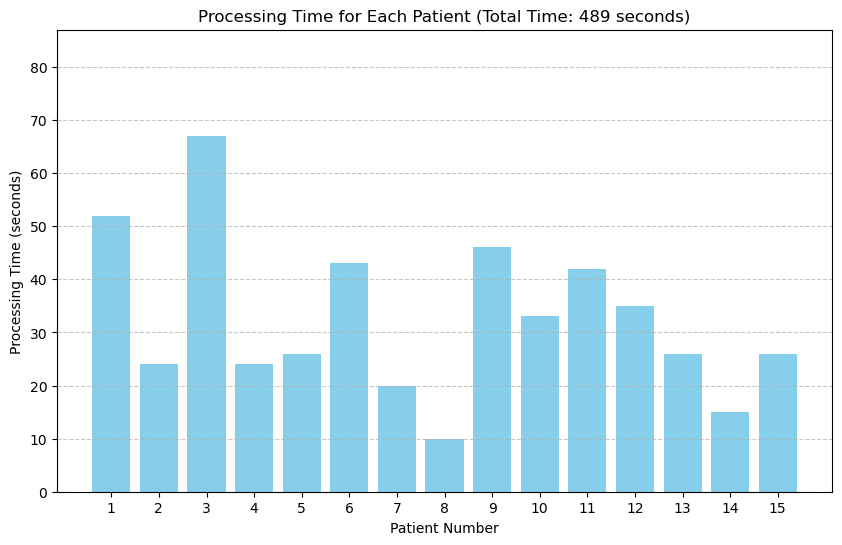

In [31]:
processing_times_in_seconds = [52, 24, 67, 24, 26, 43, 20, 10, 46, 33, 42, 35, 26, 15, 26]
plot_bar_chart(processing_times_in_seconds)

The trends were almost identical but Trial 2 took nearly a third of the time. I think maybe some of the data might have been cached since I was looking at the same hadm_id's? And so, I decided to change the code to pick 15 random hadm_id's and see what the graphs look like there.  The following trials are for `7-mult-llama3.py`.

>I am now wondering whether it might just be because laptop was on vs off charge

## Trial 1: `7-mult-llama3.py`

Model Info: llama3, chunk_size=4096, chunk_overlap=100

Patient ID's: [22961090, 22971787, 22984770, 22987108, 22999142, 23007403, 23016047, 23018977, 23024138, 23027133, 23030826, 23034003, 23036757, 23036954, 23040395]

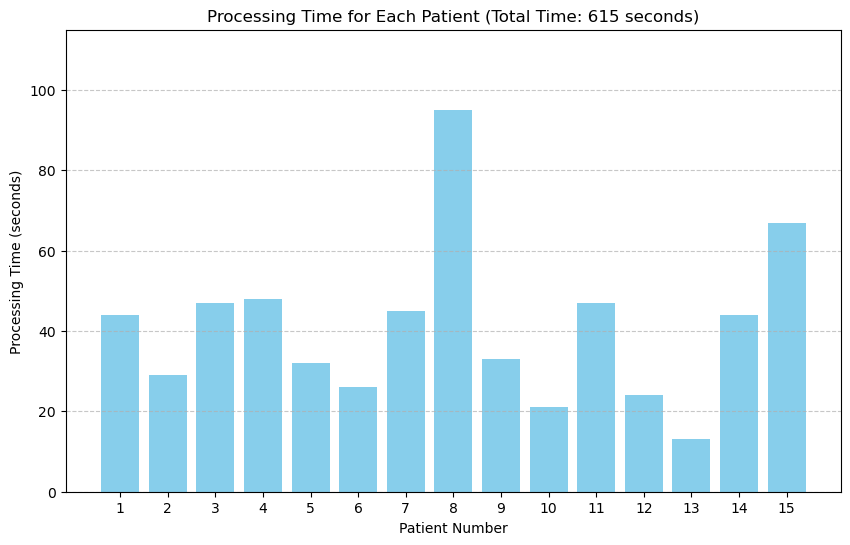

In [32]:
processing_times_in_seconds = [44,29,47,48,32,26,45,95,33,21,47,24,13,44,67]
plot_bar_chart(processing_times_in_seconds)

## Trial 2: `7-mult-llama3.py`

Model Info: llama3, chunk_size=4096, chunk_overlap=100

Patient ID's: [23686893, 23688190, 23688796, 23689523, 23690714, 23697190, 23701341, 23702421, 23703615, 23705986, 23715380, 23718278, 23724398, 23732961, 23735700]

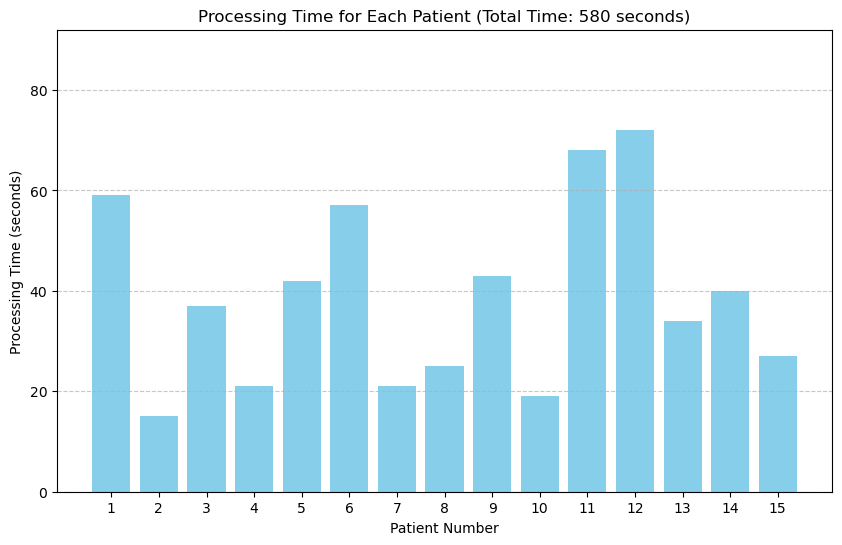

In [33]:
processing_times_in_seconds = [59,15,37,21,42,57,21,25,43,19,68,72,34,40,27]
plot_bar_chart(processing_times_in_seconds)

## Trial 3: `7-mult-llama3.py`

Model Info: llama3, chunk_size=4096, chunk_overlap=100

Patient ID's: [27618409, 27620490, 27623566, 27624253, 27628348, 27636368, 27639797, 27640781, 27645489, 27647030, 27647415, 27648581, 27648995, 27656130, 27658885]

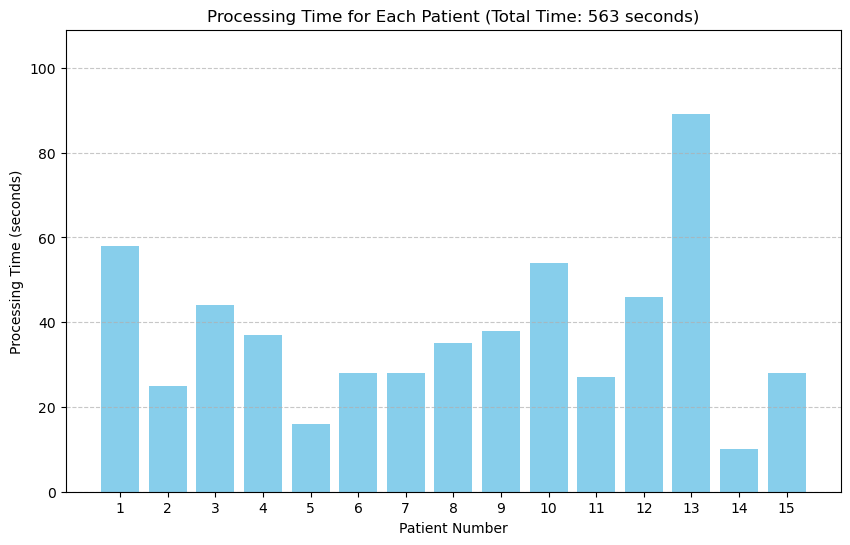

In [34]:
processing_times_in_seconds = [58,25,44,37,16,28,28,35,38,54,27,46,89,10,28]
plot_bar_chart(processing_times_in_seconds)

I then cleaned my code and started running it again and noticed it was much slower than before. I had taken my laptop off charge and when I put it back on charge it was much faster. This whole time I had kept an eye on the activity monitor and had seen no difference, but apparently taking my laptop on and off charge has a significant impact on execution time (2.5x faster when laptop was on charge).

## Trial 4: `7-mult-llama3-clean.py` LAPTOP OFF CHARGE

Model Info: llama3, chunk_size=4096, chunk_overlap=100

First 15 patient ID's: [20015730, 20022465, 20025172, 20031665, 20038242, 20050336, 20060499, 20067108, 20068469, 20069079, 20070255, 20073235, 20078619, 20087467, 20088556]

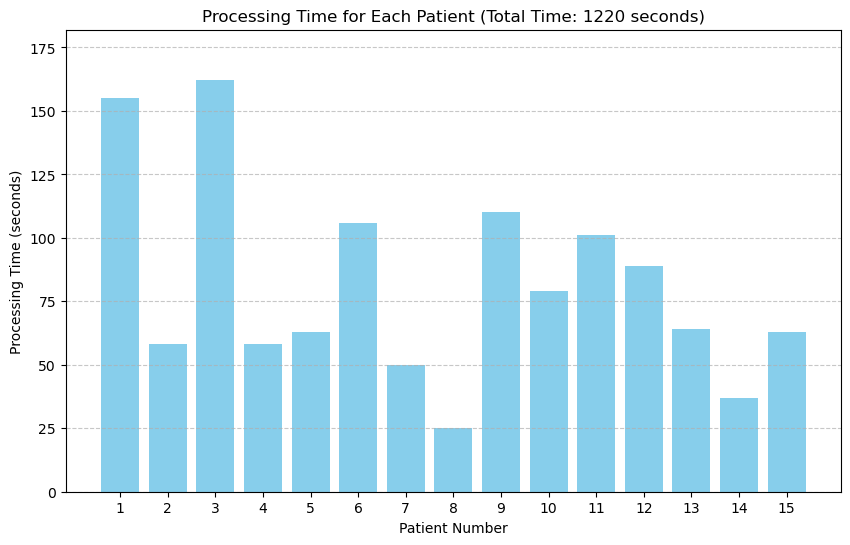

In [35]:
processing_times_in_seconds = [155, 58, 162, 58, 63, 106, 50, 25, 110, 79, 101, 89, 64, 37, 63]
plot_bar_chart(processing_times_in_seconds)

## Trial 5: `7-mult-llama3-clean.py` LAPTOP ON CHARGE

Model Info: llama3, chunk_size=4096, chunk_overlap=100

First 15 patient ID's: [20015730, 20022465, 20025172, 20031665, 20038242, 20050336, 20060499, 20067108, 20068469, 20069079, 20070255, 20073235, 20078619, 20087467, 20088556]

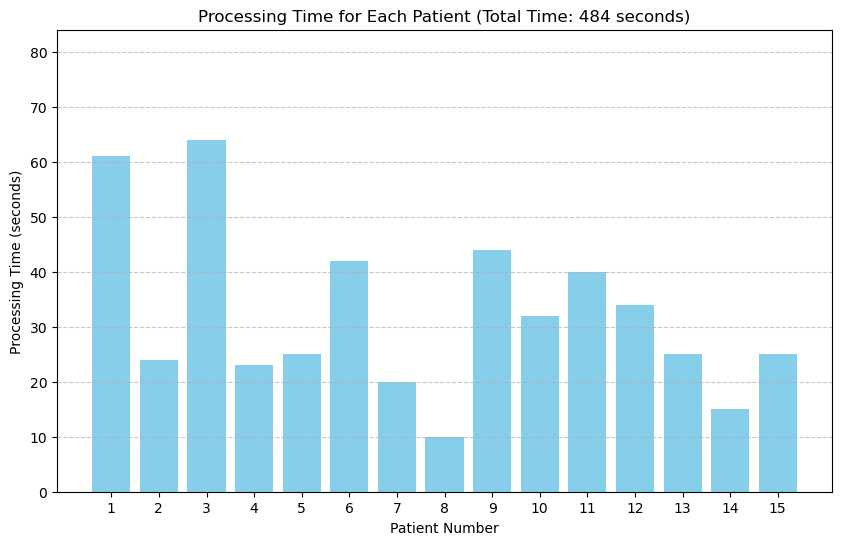

In [36]:
processing_times_in_seconds = [61, 24, 64, 23, 25, 42, 20, 10, 44, 32, 40, 34, 25, 15, 25]
plot_bar_chart(processing_times_in_seconds)

## Analysing `pneumonia-trial-1` results

Randomly Checking hadm_id’s to See If Text Contains Indication of Pneumonia (see [validation](https://github.com/anish-narain/final-year-project/tree/main/identifying-ARDS/llm-work/deploy-scripts/validation))

I read the text files  and used ChatGPT 4o

1. Patient 4, 20031665 (No): CORRECT
2. Patient 18, 20108783 (Yes): CORRECT
3. Patient 35, 20184139 (Yes): CORRECT
4. Patient 47, 20251229 (No): CORRECT
5. Patient 53, 20281754 (No): CORRECT
6. Patient 61, 20324638 (Yes): CORRECT (Recognised that Hospital aquired PNA means pneumonia. I didn’t see it myself but ChatGPT knew)
7. Patient 67, 20373312 (No): CORRECT (Did not get confused by: As compared to the previous radiograph, there is no relevant change. PICC line and nasogastric tube are in unchanged position. Unchanged mild cardiomegaly without signs of overhydration. No newly occurred focal parenchymal opacities suggesting pneumonia. No pleural effusions, no pneumothorax.)
8. Patient 74, 20409877 (Yes): CORRECT
9. Patient 84, 20465811 (Yes): WRONG 
10. Patient 92, 20489583 (No): MAYBE (While there are multiple factors indicating respiratory complications, such as diminished breath sounds, parenchymal opacity on the CXR, and the need for aggressive pulmonary toileting, the direct mention of pneumonia is not explicit. However, the findings strongly suggest the possibility of pneumonia, especially in the context of other respiratory issues and treatments provided.)


In [37]:
# Path to the CSV file
csv_file_path = 'final-exploration/pneumonia/pneumonia-results/pneumonia-trial-1.csv'

# Read the CSV file
data = pd.read_csv(csv_file_path)

Looking at effect of Discharge Text Length in time taken to evaluate for pneumonia

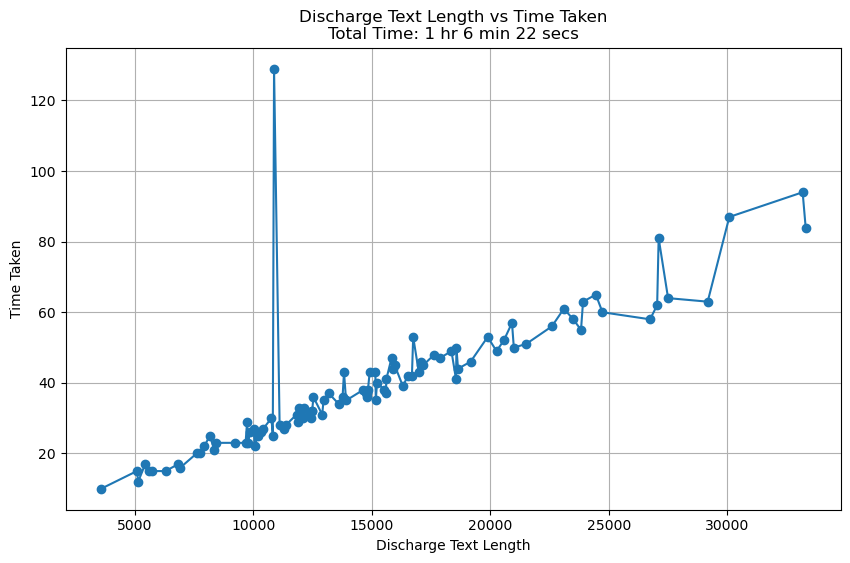

Average time per patient (in seconds) :  39.82


In [38]:
# Ensure the necessary columns are present
if 'discharge_text_length' not in data.columns or 'time_taken' not in data.columns:
    raise ValueError("The required columns are not present in the CSV file.")

# Sort the data by 'discharge_text_length' in ascending order
sorted_data = data.sort_values(by='discharge_text_length')

# Sum all the values in 'time_taken' (in seconds)
total_seconds = sorted_data['time_taken'].sum()

hours = total_seconds // 3600
minutes = (total_seconds % 3600) // 60
seconds = total_seconds % 3600 % 60
total_time_str = f"{hours} hr {minutes} min {seconds} secs"

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['discharge_text_length'], sorted_data['time_taken'], marker='o', linestyle='-')
plt.xlabel('Discharge Text Length')
plt.ylabel('Time Taken')
plt.title(f'Discharge Text Length vs Time Taken\nTotal Time: {total_time_str}')
plt.grid(True)
plt.show()

print("Average time per patient (in seconds) : ", total_seconds/100)

## Tried pre-processing the data to see the impact

See `speed-attempt-1.py` in further-exploration

[64, 21, 60, 21, 23, 40, 18, 9, 41, 28, 36, 31, 23, 13, 23]


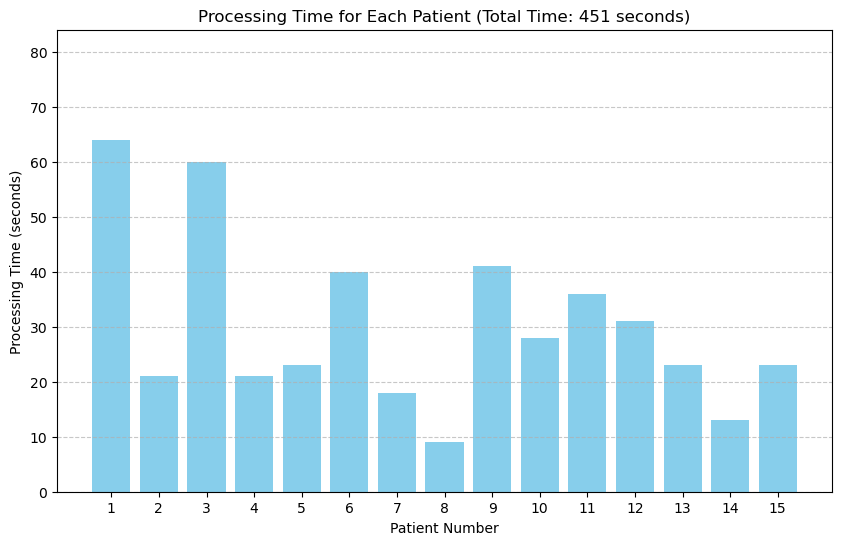

In [39]:
# Read the CSV file and extract processing times
processing_times_in_seconds = []

with open('further-exploration/results/speed-trial-1.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        processing_times_in_seconds.append(int(row['time_taken']))

print(processing_times_in_seconds)

plot_bar_chart(processing_times_in_seconds)

In [40]:
def read_pneumonia_data(file_path):
    pneumonia_data = {}
    with open(file_path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            hadm_id = int(row['hadm_id'])
            pneumonia_detected = row['pneumonia_detected']
            pneumonia_data[hadm_id] = pneumonia_detected
    return pneumonia_data

# Paths to the CSV files
speed_trial_file = 'further-exploration/results/speed-trial-1.csv'
pneumonia_trial_file = 'final-exploration/pneumonia/pneumonia-results/pneumonia-trial-1.csv'

# Read the pneumonia data from both files
speed_trial_data = read_pneumonia_data(speed_trial_file)
pneumonia_trial_data = read_pneumonia_data(pneumonia_trial_file)

# Compare the pneumonia_detected values for the common hadm_id values
for hadm_id in speed_trial_data:
    if hadm_id in pneumonia_trial_data:
        if speed_trial_data[hadm_id] == pneumonia_trial_data[hadm_id]:
            print(f'hadm_id {hadm_id}: Match')
        else:
            print(f'hadm_id {hadm_id}: Mismatch')
    else:
        print(f'hadm_id {hadm_id}: Not found in pneumonia_trial_file')

hadm_id 20015730: Match
hadm_id 20022465: Match
hadm_id 20025172: Match
hadm_id 20031665: Match
hadm_id 20038242: Match
hadm_id 20050336: Match
hadm_id 20060499: Match
hadm_id 20067108: Match
hadm_id 20068469: Match
hadm_id 20069079: Match
hadm_id 20070255: Match
hadm_id 20073235: Mismatch
hadm_id 20078619: Match
hadm_id 20087467: Match
hadm_id 20088556: Match


Overall the time saved would be 6 minutes (for ~ 2000 patients) however it is not good that there is a mismatch in the first 15. And so, without preprocessing is fine.

# Running on L4 GPU on Colab

20015730,24729,Yes,7
20022465,9219,Yes,3
20025172,29166,Yes,8
20031665,9779,No,3
20038242,10198,Yes,3
20050336,16691,Yes,5
20060499,7772,Yes,2
20067108,3581,No,1
20068469,18635,Yes,5
20069079,12459,Yes,4
20070255,15610,No,5
20073235,13183,Yes,4
20078619,10420,No,3
20087467,5601,Yes,2
20088556,10822,Yes,3

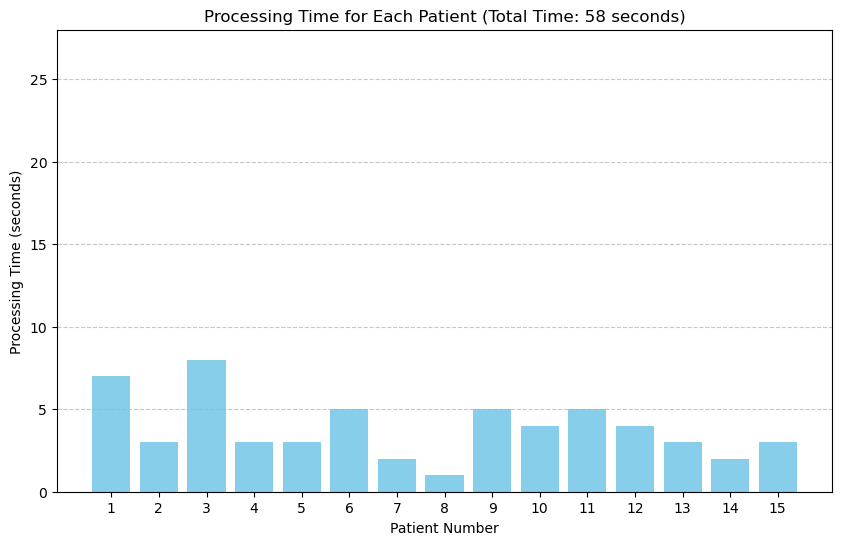

In [41]:
processing_times_in_seconds = [7, 3, 8, 3, 3, 5, 2, 1, 5, 4, 5, 4, 3, 2, 3]
plot_bar_chart(processing_times_in_seconds)

# Plotting Time Against Text Length Graphs for Report

In [42]:
import matplotlib.pyplot as plt

def plot_discharge_vs_time(discharge_text_length, processing_times_in_seconds, title_suffix, image_name):
    if len(discharge_text_length) != len(processing_times_in_seconds):
        raise ValueError("The length of discharge_text_length and processing_times_in_seconds must be equal.")

    average_processing_time = sum(processing_times_in_seconds) / len(processing_times_in_seconds)

    plt.figure(figsize=(10, 6))
    plt.scatter(discharge_text_length, processing_times_in_seconds, color='b')
    plt.xlabel('Discharge Text Length')
    plt.ylabel('Processing Time (seconds)')
    plt.title(f'Processing Time vs. Discharge Text Length {title_suffix}\nAverage Processing Time per Patient: {average_processing_time:.2f} seconds')
    plt.grid(True)
    plt.savefig(image_name)
    plt.show()


discharge_text_lengths = [24729,9219,29166,9779,10198,16691,7772,3581,18635,12459,15610,13183,10420,5601,10822]

Without M1 GPU

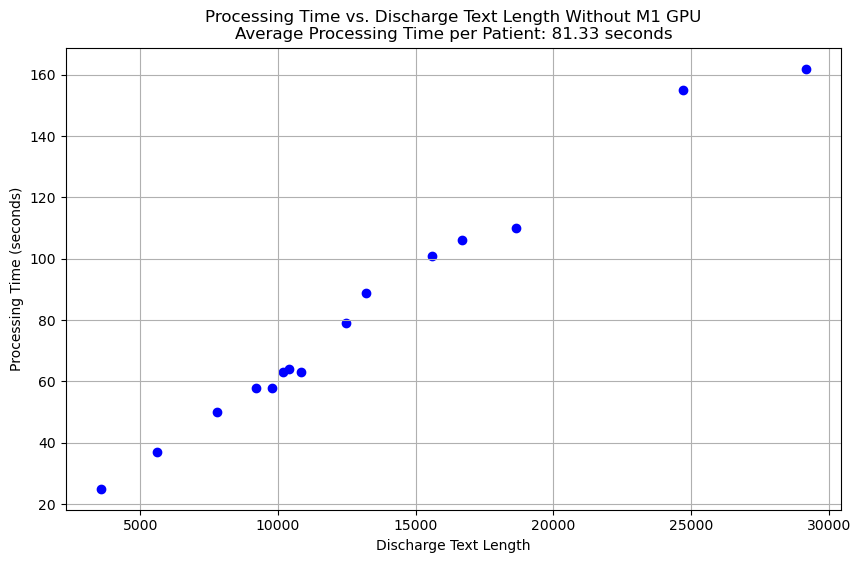

In [43]:
processing_times_in_seconds = [155, 58, 162, 58, 63, 106, 50, 25, 110, 79, 101, 89, 64, 37, 63]

plot_discharge_vs_time(discharge_text_lengths, processing_times_in_seconds, "Without M1 GPU", "without-m1.png")

With M1 GPU

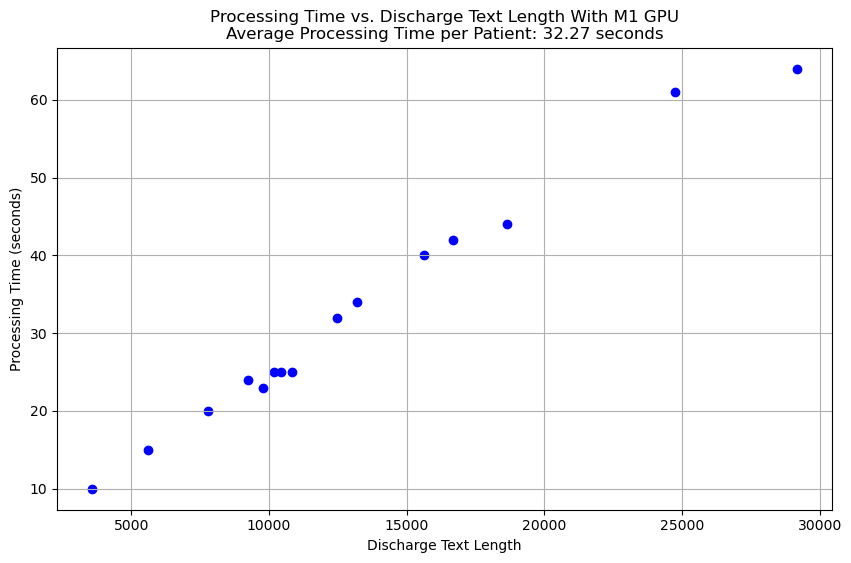

In [44]:
processing_times_in_seconds = [61, 24, 64, 23, 25, 42, 20, 10, 44, 32, 40, 34, 25, 15, 25]
plot_discharge_vs_time(discharge_text_lengths, processing_times_in_seconds, "With M1 GPU", "with-m1.png")

With M1 GPU and Preprocessing

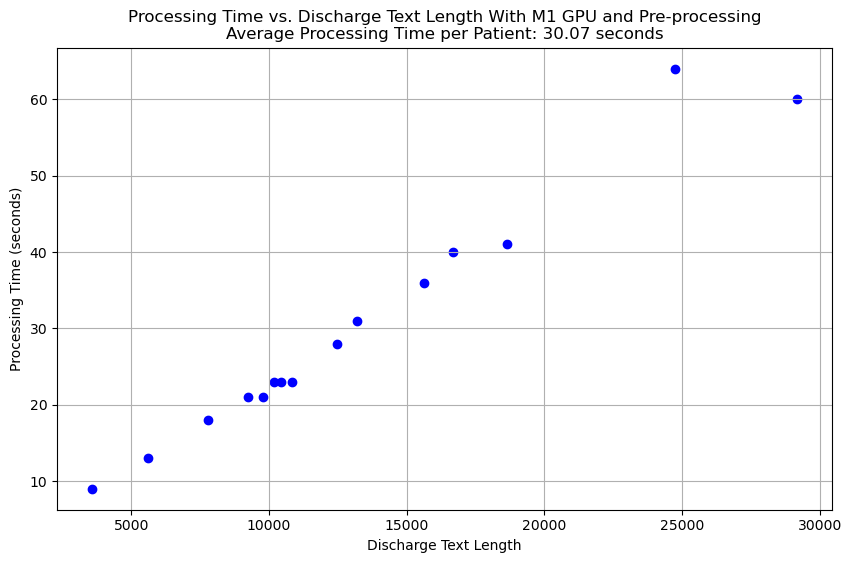

In [45]:
processing_times_in_seconds = [64, 21, 60, 21, 23, 40, 18, 9, 41, 28, 36, 31, 23, 13, 23]
plot_discharge_vs_time(discharge_text_lengths, processing_times_in_seconds, "With M1 GPU and Pre-processing", "with-m1-and-preprocessing.png")

With L4 GPU on Colab

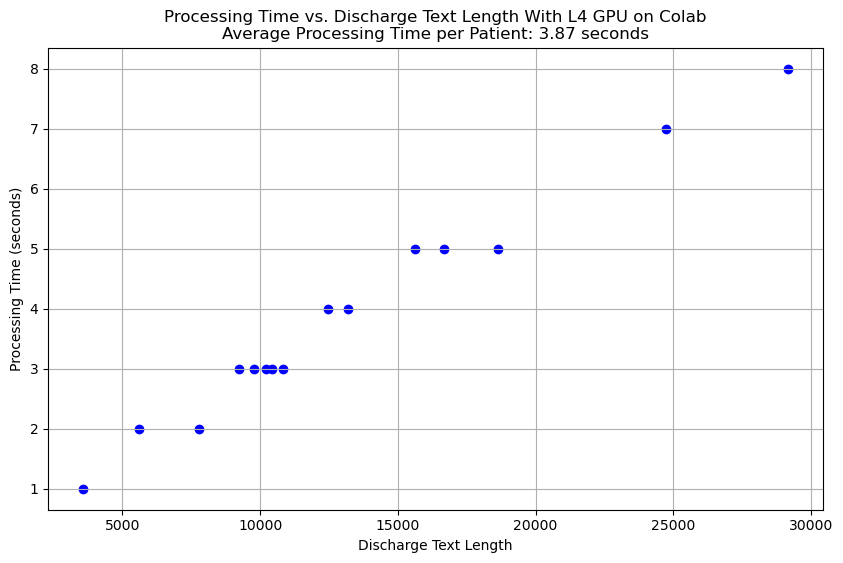

In [46]:
processing_times_in_seconds = [7, 3, 8, 3, 3, 5, 2, 1, 5, 4, 5, 4, 3, 2, 3]
plot_discharge_vs_time(discharge_text_lengths, processing_times_in_seconds, "With L4 GPU on Colab", "with-L4.png")